## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Mengubah parameter default matplotlib
Parameter default matplotlib dapat diubah dengan rcParams sebagai berikut


In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load dataset

Load dataset yang ingin dipre-process dengan menggunakan `pd.read_csv()`.

In [3]:
## CODE HERE
df = pd.read_csv('misteri.csv')
df.head()

,A,B,C,D,E,F
0,52.694032,1.770970e+07,7.0,4.307956e+07,0.0,0.0
1,58.311613,1.649032e+07,0.0,4.179668e+07,0.0,0.0
2,50.306117,1.609868e+07,1.0,4.266504e+07,0.0,NaN
3,52.223764,1.862330e+07,0.0,2.406180e+07,0.0,0.0
4,52.017818,2.070175e+07,NaN,5.429762e+07,0.0,0.0


Pastikan isi dataset dengan menggunakan `df.info()` dan `df.describe()`. Pisahkan kolom menjadi numerik dan kategorikal apabila diperlukan.

In [4]:
## CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13592 entries, 0 to 13591
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       13418 non-null  float64
 1   B       13415 non-null  float64
 2   C       13417 non-null  float64
 3   D       13405 non-null  float64
 4   E       13406 non-null  float64
 5   F       13429 non-null  float64
dtypes: float64(6)
memory usage: 637.2 KB


In [5]:
df.describe()

,A,B,C,D,E,F
count,13418.000000,1.341500e+04,13417.000000,1.340500e+04,13406.000000,13429.000000
mean,50.604303,1.646446e+07,2.537825,3.522170e+07,0.151574,0.040882
std,7.185786,3.385392e+06,2.830022,2.118154e+07,0.358621,0.198023
min,22.000000,7.540000e+06,0.000000,1.000000e+06,0.000000,0.000000
25%,45.710112,1.405912e+07,1.000000,2.049483e+07,0.000000,0.000000
50%,50.513100,1.612895e+07,2.000000,3.031256e+07,0.000000,0.000000
75%,55.457167,1.854458e+07,4.000000,4.465140e+07,0.000000,0.000000
max,80.000000,3.400000e+07,13.000000,2.340000e+08,1.000000,1.000000


In [6]:
# CODE HERE
nums = ['A','B','C','D']
cats = ['E','F']

## Missing Data

Pertama, kita akan menangani data-data yang hilang. Cek jumlah data yang hilang dengan menggunakan `df.isna().sum()`.

In [7]:
## CODE HERE
df.isna().sum()

A    174
B    177
C    175
D    187
E    186
F    163
dtype: int64

Terdapat 6 kolom yang memiliki data hilang. <br>Kolom tersebut yaitu `A`, `B`, `C`, `D`, `E`, dan `F`.

### Drop

Apakah kita ingin menangani data dengan cara menghapus mereka? Kalau ya, hapus baris-baris dengan menggunakan `df.dropna()`.

In [8]:
## CODE HERE
df.dropna(subset=['F'], inplace=True)
df.isna().sum()

A    173
B    176
C    173
D    187
E    185
F      0
dtype: int64

Kita putuskan untuk menghapus data yang hilang pada kolom `F` karena proporsi jumlah data yang hilang pada kolom `F` sangat sedikit apabila dibandingkan dengan jumlah data secara keseluruhan kolom F.

### Imputasi Numeric

Apakah kita ingin menangani data hilang di kolom tertentu dengan imputasi? Kalau ya, lakukan imputasi dengan menggunakan `df.fillna()`

In [9]:
## CODE HERE
df['A'].fillna(df['A'].mean(), inplace=True)
df['B'].fillna(df['B'].median(), inplace=True)
df['C'].fillna(df['C'].mean(), inplace=True)
df['D'].fillna(df['D'].median(), inplace=True)

Diputuskan untuk melakukan imputasi pada kolom-kolom tersebut karena imputasi dapat tetap mempertahankan semua kasus (mewakili keadaan data) dengan mengganti data yang hilang dengan nilai perkiraan karakteristik data yang tersedia.<br> Nilai yang digunakan untuk imputasi adalah mean dan median. Apabila data cenderung normal, maka digunakan imputasi mean. Sedangkan jika data cenderung skew, maka digunakan imputasi median.

### Imputasi Categorical

Apakah kita ingin menangani data hilang di kolom tertentu dengan imputasi? Kalau ya, lakukan imputasi dengan menggunakan `df.fillna()`

In [10]:
## CODE HERE
df['E'].fillna(df['E'].mode()[0], inplace=True)

Diputuskan untuk melakukan imputasi pada kolom-kolom tersebut karena imputasi dapat tetap mempertahankan semua kasus (mewakili keadaan data) dengan mengganti data yang hilang dengan nilai perkiraan karakteristik data yang tersedia.<br>
Nilai yang digunakan untuk imputasi adalah nilai modus yang dimiliki setiap kolom karena modus menggambarkan keadaan dominan yang terjadi pada suatu data kategori.

Cek sekali lagi apakah semua nilai hilang sudah ditangani.

In [11]:
## CODE HERE
df.isna().sum()

A    0
B    0
C    0
D    0
E    0
F    0
dtype: int64

## Duplicated Data

Selanjutnya, kita akan menangani data duplikat. Gunakan `df.duplicated.sum()` untuk mengecek jumlah kolom hilang. Kemudian gunakan `df.drop_duplicates()` untuk menghapus baris-baris duplikat.

In [12]:
## CODE HERE
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

821
0


Iya, akhirnya semua data duplikat dihapus karena kita yakin kita tidak memerlukan baris-baris duplikat.

## Outliers

Setelah data yang hilang dan duplikat, kita akan menangani outlier. Ada 2 cara untuk melakukan ini:
* Dengan Z-score
* Dengan IQR

### Menggunakan Z-score

Diputuskan untuk menangani outlier yaitu dengan memfilter data yang memiliki nilai Z-score < 3. Karena Z-score merupakan standarisasi pada data dengan kriteria bahwa Z-score < 3 bukan merupakan outlier.

In [13]:
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

## CODE HERE
filtered_entries = np.array([True] * len(df))
for col in ['A', 'C']:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 12608
Jumlah baris setelah memfilter outlier: 12202


### Menggunakan IQR

Diputuskan menangani outlier dengan IQR karena IQR robust terhadap outlier

In [14]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

## CODE HERE
filtered_entries = np.array([True] * len(df))
for col in ['B', 'D']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 12202
Jumlah baris setelah memfilter outlier: 11566


### Normalization/Standardization

Perlu dilakukan normalization/standardization karena:
* Data dengan skala yang sama akan menjamin algoritma pembelajaran memperlakukan semua feature dengan adil
* Data dengan skala yang sama dan centered akan mempercepat algoritma pembelajaran
* Data dengan skala yang sama akan mempermudah interpretasi beberapa model ML

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
## CODE HERE
df['A_norm'] = MinMaxScaler().fit_transform(df['A'].values.reshape(len(df), 1))
df['C_norm'] = MinMaxScaler().fit_transform(df['C'].values.reshape(len(df), 1))

Diputuskan untuk melakukan normalization/standardization. <br>
Cek apakah nilai tertransformasi dengan benar dengan menggunakan `df.describe()`

In [16]:
## CODE HERE
df.describe()

,A,B,C,D,E,F,A_norm,C_norm
count,11566.000000,1.156600e+04,11566.000000,1.156600e+04,11566.000000,11566.000000,11566.000000,11566.000000
mean,50.467256,1.631382e+07,2.235984,3.235070e+07,0.137731,0.028013,0.499152,0.279498
std,6.957623,3.131400e+06,2.265667,1.604263e+07,0.344633,0.165017,0.164133,0.283208
min,29.308063,7.540000e+06,0.000000,1.000000e+06,0.000000,0.000000,0.000000,0.000000
25%,45.706791,1.405936e+07,0.000000,2.018684e+07,0.000000,0.000000,0.386851,0.000000
50%,50.513100,1.612613e+07,1.000000,2.969146e+07,0.000000,0.000000,0.500234,0.125000
75%,55.200101,1.837394e+07,3.000000,4.218794e+07,0.000000,0.000000,0.610802,0.375000
max,71.698317,2.505519e+07,8.000000,8.008210e+07,1.000000,1.000000,1.000000,1.000000


### Feature Encoding

Perlu melakukan feature encoding.

In [17]:
for cat in cats:
    # CODE HERE
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

Kita memerlukan feature encoding karena tak semua model/algoritma ML dapat menggunakan feature categorical. <br>
Jenis feature encoding apa yang kita akhirnya gunakan yaitu One-hot encoding. One-hot encoding lebih baik karena One-hot encoding melakukan perubahan feature categorical menjadi numeric dengan menjadikan masing-masing nilai unik feature tersendiri.

Jangan lupa gabungkan encoded feature dengan dataframe awal dan cek apakah sudah tergabung dengan baik dengan menggunakan `df.columns`

In [18]:
## CODE HERE
df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'A_norm', 'C_norm', 'E_0.0', 'E_1.0',
       'F_0.0', 'F_1.0'],
      dtype='object')

## Imbalanced Dataset

Apakah target kita imbalanced? Cek dengan menggunakan `value_counts()`. Apakah kita perlu melakukan Over/Undersampling?

Kalau ya, persiapkan data kitauntuk over/undersampling dengan memisahkan mereka ke variabel `X` dan `y`.

In [19]:
df['F_class'] = df['F']
df['F_class'].value_counts()

0.0    11242
1.0      324
Name: F_class, dtype: int64

In [20]:
## CODE HERE
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['F', 'F_class']]]
y = df['F_class'].values
print(X.shape) 
print(y.shape)

(11566, 11)
(11566,)


Lakukan under sampling dengan menggunakan Sampler dari `imblearn`.

In [21]:
from imblearn import over_sampling, under_sampling
## CODE HERE
X_over, y_over = under_sampling.RandomUnderSampler().fit_resample(X, y)
pd.Series(y_over).value_counts()

1.0    324
0.0    324
dtype: int64

Jangan lupa cek distribusi kelas/label setelah sampling dengan menggunakan `value_counts()`.

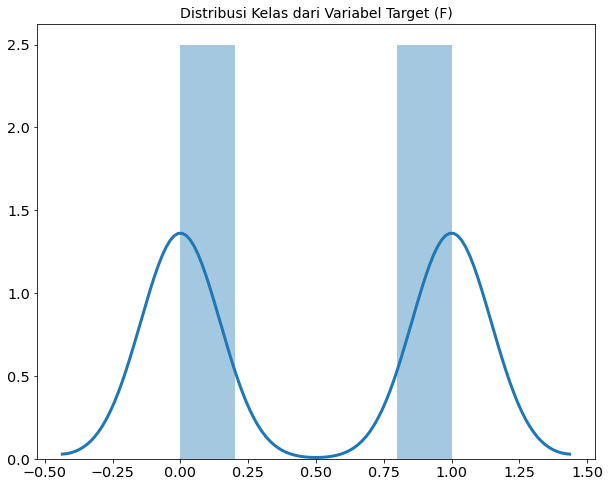

In [22]:
plt.figure(figsize = (10,8))
sns.distplot(y_over)
plt.title('Distribusi Kelas dari Variabel Target (F)', fontsize=14);
plt.show()

Jadi terlihat bahwa distribusi setelah sampling adalah distribusi normal.